# Titanic

_Welcom to my second Notebook!_

>Here is some principal points that i've covered through this Notebook :
- **Import necessery libraries**
- **Exploratory Data Analysis**
   - Understand and explore the data
   - Visualisation of each variable
   - Visualisation of variables againt each other
   - Correlation matrix
   - Conclusion & Assumptions
- **Feature Engineering**
   - Handle Missing values
   - Handle irrelevant features
   - Log transformation
- **Preprocessing**
   - Encoder categorial variables
- **Modelling**
   - Use various classifiers
   - Tunnig Hyperparameters
   - Compare their performance
   - Choose the best Classifier 
   


In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

random_state = 0

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Setting pandas to display a N number of columns and rows 
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 33)

### About Titanic dataset :



- **Survived**: that's the target,
   * 0 : means the passenger did not survive
   * 1 : means he/she survived
- **Pclass**: passenger class.
   * 1 : Upper Class
   * 2 : Middle Class
   * 3 : Lower Class
- **Name**, **Sex**, **Age**: self-explanatory
- **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
- **Parch**: how many children & parents of the passenger aboard the Titanic.
- **Ticket**: ticket id
- **Fare**: price paid (in pounds)
- **Cabin**: passenger's cabin number
- **Embarked**: where the passenger embarked the Titanic
  * C -> Cherbourg
  * Q -> Queenstown
  * S -> Southampton

In [2]:
#import the train and test set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Exploratory Data Analysis

### Train set

In [3]:
# Peek at the train set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> _From the table above, we can note a few things:_
- First of all, that we need to _convert a lot of features into numeric ones_ later on, so that the machine learning algorithms can process them.
- Furthermore, we can see that the features have widely _different ranges_ , that we will need to convert into roughly the same scale.
- We can also spot some more features, that contain _missing values_ (NaN = not a number), that wee need to deal with.

> Assumptions : **What features could contribute to a high survival rate ?**

To me it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- **Features type** :
   - Categorial features: Embarked, Survived and Sex. Ordinal feature: Pclass
   - Numerical features :
     - Continous: Age, Fare
     - Discrete: SibSp, Parch 
- **Features with mixed data types** : 
   - Ticket : is a mix of numeric and alphanumeric data types
   - Cabin : is alphanumeric
- **Features may contain errors or typos** :
   - This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting
   - Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.
- **Train shape** : (891, 12)
- **Missing values** 
    - Age :20% null values,
    - Cabin : 77% null values, 
    - Embarked: 0.2% null values


 

In [5]:
# Get the Percentage of missing values 

total = train.isnull().sum().sort_values(ascending=False)

percent_1 = train.isnull().sum()/ train.shape[0] *100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(4)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0


- The Embarked feature has only 2 missing values, which can easily be filled. 
- It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values.
- The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77% of it are missing.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**The distribution of numerical feature values across the samples**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- The mean Fare was £32.20, which does not seem so expensive (but it was probably a lot of money back then)
- Fares varied significantly with few passengers (<1%) paying as high as £512.
- Only 38% Survived ( That's close enough to 40% )
- Most passengers (> 75%) did not travel with parents or children
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- The mean Age was less than 30 years old
- The passenger ages range from 0.4 to 80
- Few elderly passengers (<1%) within age range 65-80.
- Most of passengers (80%) were in class 3 and 2

In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kassem, Mr. Fared",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


**The distribution of categorical features**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [8]:
print(train.shape)

(891, 12)


### Test dataset

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test.shape

(418, 11)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- Missing values percentage :
  - Age : 20% are null
  - Fare : 0.23% are null
  - Cabin: 78% are null
  

**The distribution of numerical features**

In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- Survived column is not in the test data
- Almost we have the same notes that we've written down on the train for numerical features

**The distribution of categorial feature**

In [13]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Wenzel, Mr. Linhart",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


- Same conclusion taken on the train set for categorial varaibles 

## Exploratory Data Analysis

Through this Exploratory data analysis :How i proceed :

- I will visualize variables to gain insights and inspect some interesting pattern in the dataset.I prefer to plot a distplot for numerical and continous variables to see how they are ditributed and boxplot to detect outliers. Then I plot those variables againts each other to see if they are some kind of correlaction between them 
- For categorial variables i proceed excatly like what I did for numerical variables. I choose suitable plots for categorial variables to plot the ditribution of classes  

#### Survived

- is the target variable we are trying to predict (0 or 1):
   - 1 :Survived
   - 0 :Not Survived
   
   
- 38.38% of training set is Class 1
- 61.62% of training set is Class 0

In [14]:
survived = train['Survived'].value_counts()[1]
not_survived = train['Survived'].value_counts()[0]

survived_per = survived / train.shape[0] * 100
not_survived_per = not_survived / train.shape[0] * 100

print('{} of {} passengers survived and it represents {:.2f}% of the training set'.format(survived, train.shape[0], survived_per))
print('{} of {} passengers didnt survive and it represents {:.2f}% of the training set'.format(not_survived, train.shape[0], not_survived_per))

342 of 891 passengers survived and it represents 38.38% of the training set
549 of 891 passengers didnt survive and it represents 61.62% of the training set


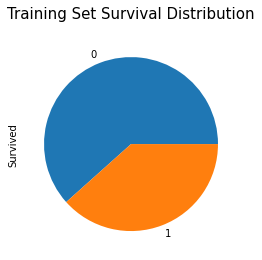

In [15]:
plt.figure()
train['Survived'].value_counts().plot.pie()
plt.title('Training Set Survival Distribution', size=15, y=1.05)
plt.show()

### Sex

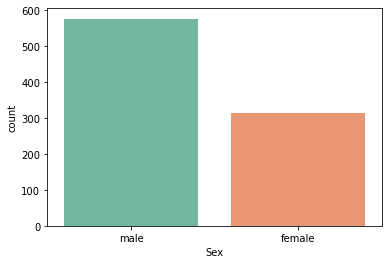

In [16]:
sns.countplot(x='Sex', data=train, palette=sns.color_palette("Set2")) 

- most of the passengers were men

### Embarked

- is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
  - `C = Cherbourg` in France
  - `Q = Queenstown` in Ireland
  - `S = Southampton` in UK


##### CLass Distribution :

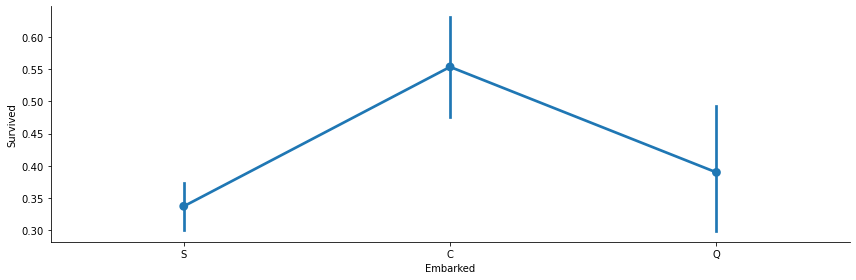

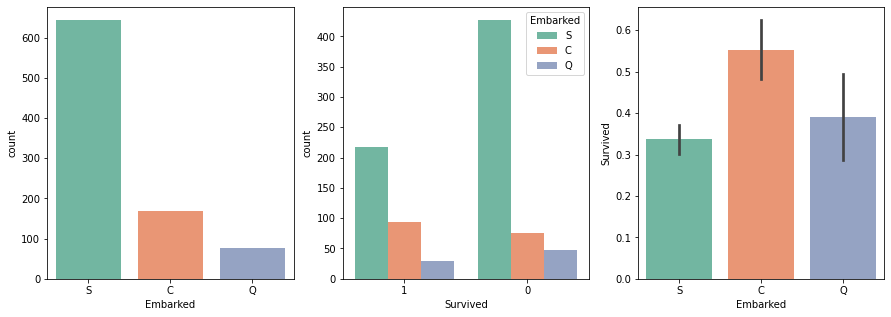

In [17]:
sns.color_palette("colorblind")

sns.factorplot('Embarked','Survived', data=train,size=4, aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=train, ax=axis1, palette=sns.color_palette("Set2"))
sns.countplot(x='Survived', hue="Embarked", data=train, order=[1,0], ax=axis2, palette=sns.color_palette("Set2"))
sns.barplot(x='Embarked', y='Survived', data=train ,order=['S','C','Q'],ax=axis3 , palette=sns.color_palette("Set2"))

- Almost 70% of the passengers were embarked from the Southampton port 'S'
- Only 17% of passengers were embarked from the Cherbourg port 'C'  and  just 9% of theme were embarked from the Queenstown port 'Q' 
- Passengers boarded from port C have a high survival rate, unlike passengers boarded from port S, the survival rate is very low


##### Missing Values :

- The Embarked feature has just 0.2% of missing values. 
- Let's show these null values: 

In [18]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- There are only 2 missing values in the whole data set
- Both of those passengers are female, in upper class (Class1)
- They have the same ticket number . This means that they know each other and embarked from the same port together.
- Both of them survived
- Based on the numerical summary :
   - The mode Embarked value for an upper class female passenger is C (Cherbourg)  , but this doesn't necessarily mean that they embarked from this port

- When I googled Stone, Mrs. George Nelson (Martha Evelyn), I found that she embarked from S (Southampton) with her maid Amelie Icard,in this page [Martha Evelyn Stone: Titanic Survivor](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

> *Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.*

Missing values in `Embarked` are filled with **S** with this information in Preprocessing phase
 

### Cabin:

`Cabin` feature is little bit tricky and it needs further exploration. The large portion (77%) of the `Cabin` feature is missing and the feature itself can't be ignored completely because some the cabins might have higher survival rates.


In [19]:
train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
C22 C26        3
              ..
D10 D12        1
B39            1
C104           1
E36            1
B37            1
Name: Cabin, Length: 147, dtype: int64

### Pclass

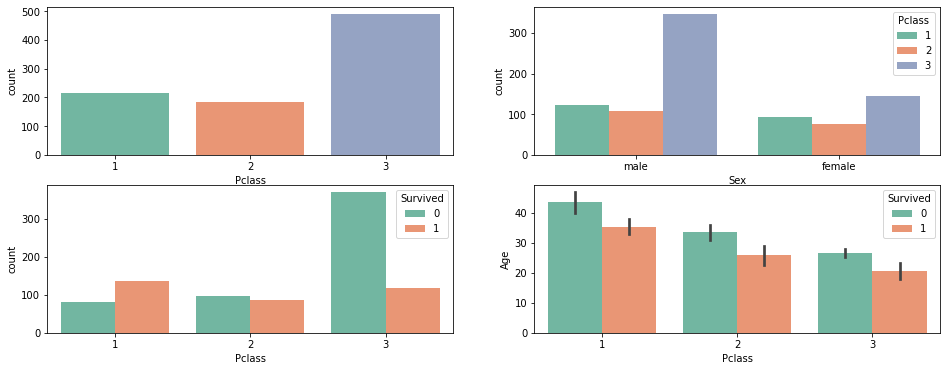

In [20]:
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.countplot(x='Pclass', data=train, palette=sns.color_palette("Set2"))
plt.subplot(2,2,2)
sns.countplot(x='Sex',hue='Pclass' ,data=train, palette=sns.color_palette("Set2"))
plt.subplot(2,2,3)
sns.countplot(x='Pclass',hue='Survived', data=train, palette=sns.color_palette("Set2"))
plt.subplot(2,2,4)
sns.barplot(x='Pclass',y='Age',hue='Survived' ,data=train, palette=sns.color_palette("Set2"))

- An overwhelming number of passengers were in class 3, especially male gender
- We can spot a high probability that a person in pclass 3 will not survive, which make sense that The mean age of survivors was very low in class 3 (around 20), compared to classes 2 and 1
- We can infer that that Pclass is contributing to a persons chance of survival, especially if this person was in class 1


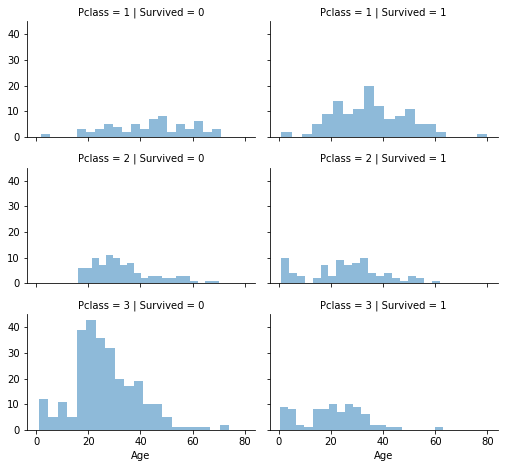

In [21]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

- The plot above confirms our assumption about pclass 1

### Age 

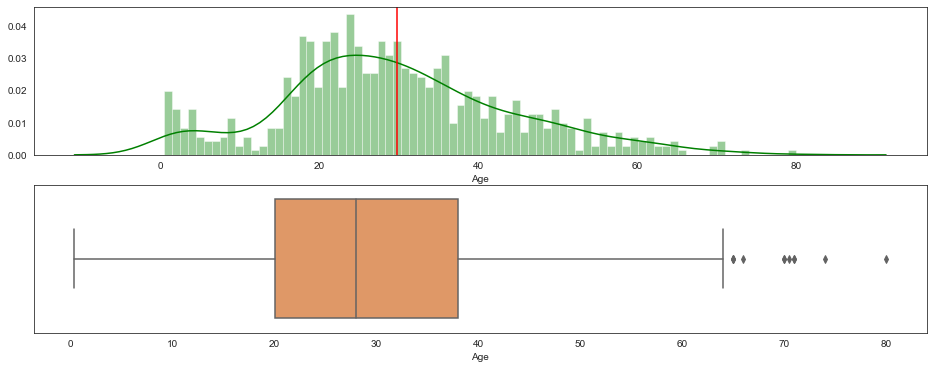

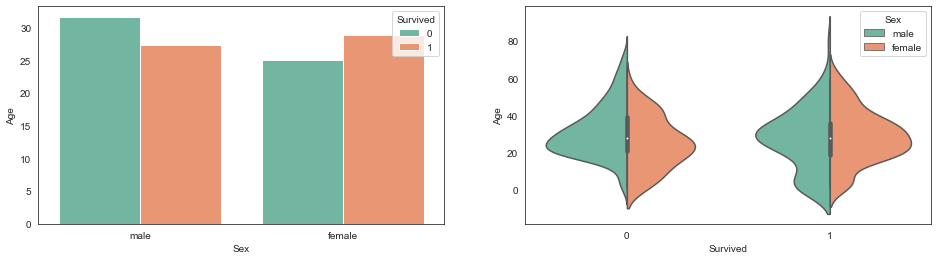

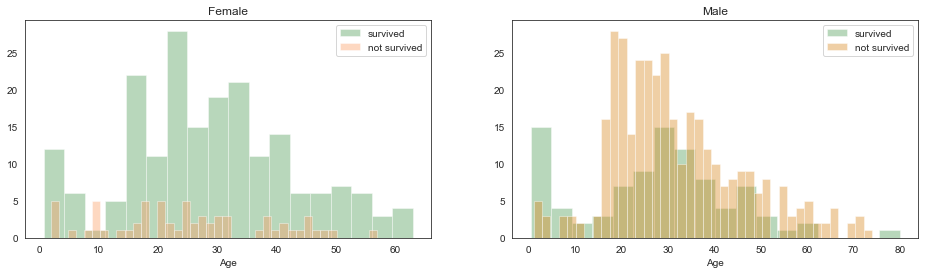

In [22]:
# Calculating the mean
mean = train['Age'].mean()

#Distplot
sns.set_style('white')
plt.figure(figsize=(16,6))

plt.subplot(2,1,1)
sns.distplot(train['Age'], bins=80, color='green')
plt.axvline(mean, 0,1, color = 'red')

#Boxplot
plt.subplot(2,1,2)
sns.boxplot(x='Age', data=train,color='#F39453')

#Age Vs Sex and Age
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='Sex',y='Age',data=train, hue='Survived', ci=False, ax=axis1, palette=sns.color_palette("Set2"))
sns.violinplot(x='Survived', y='Age', hue='Sex', data=train, ax=axis2, split=True, palette=sns.color_palette("Set2"))


#Plot female ages against Survived & male ages againt Survived
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))

women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18,color='#4E9B56', label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40,color='#FA9F64' ,label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18,color='#4E9B56',  label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, color='#D9871F' ,label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

plt.show()

- Age feature follows a Normal distrubution
- We can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.
- Another thing to note is that infants also have a little bit higher probability of survival.
- We can infer that women have a great chances of survival regardless of their age.

### Fare

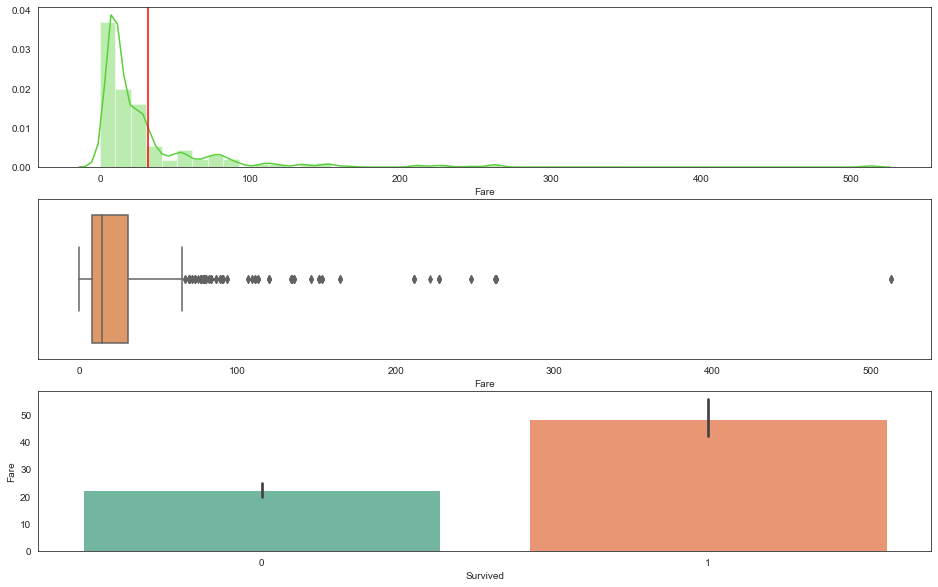

In [23]:
# Calculating the mean
mean = train['Fare'].mean()

#distplot
sns.set_style('white')
plt.figure(figsize=(16,10))

plt.subplot(3,1,1)
sns.distplot(train['Fare'], color='#59CF39' )
plt.axvline(mean, 0,1, color = 'red')

#Boxplot
plt.subplot(3,1,2)
sns.boxplot(x='Fare', data=train, color='#F39453')

#plot Survived Vs Fare
plt.subplot(3,1,3)
sns.barplot(x='Survived', y='Fare', data=train, palette=sns.color_palette("Set2"))
plt.show()


- We notice that the Fare variable doesn't follow a normal distribution.
- In preprocessing we'll compute its logarithm in order to have a Normal Distribution

### Parch and SibSp

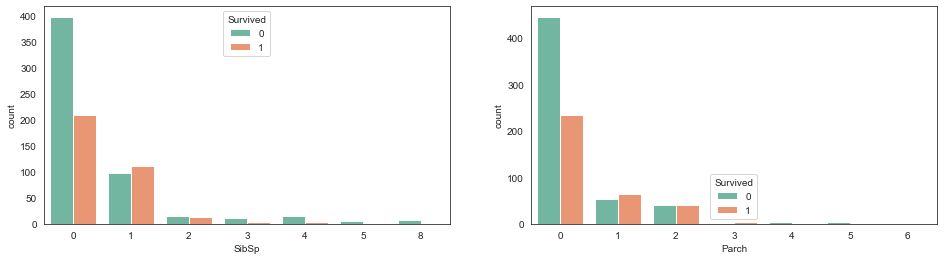

In [24]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

sns.countplot(x='SibSp', hue='Survived', data=train, ax=ax1, palette=sns.color_palette("Set2"))
sns.countplot(x='Parch', hue='Survived', data=train, ax=ax2, palette=sns.color_palette("Set2"))


- It's clear that people with more siblings or spouses aboard were less likely to survive. 
- People with less than four parents or children aboard are more likely to survive than those with four or more. 
- Again, people traveling alone are less likely to survive 

### Name

In [25]:
#train.head()

In [26]:
#With regular expression i will extract how each title occured for both Sex
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
#aggregate the various titles into more common names classes 

train['Title'] = train['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 
                                         'Jonkheer', 'Dona'], 'Rare')    
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


- The table above confirms that the majority of titanic's passengers were men whith different backgrounds and status 
- It seems logical to aggregate these various titles into more common names classes 

### Correlation Matrix

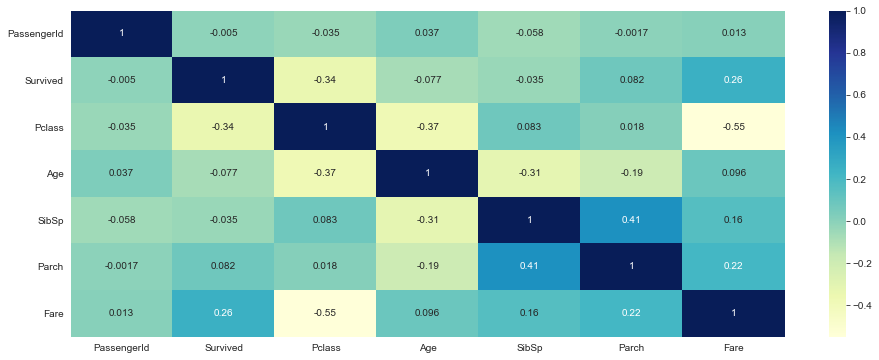

In [28]:
plt.figure(figsize=(16,6))
sns.color_palette("Set2")
sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")

In [29]:
train.corr().Survived.abs().sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

- As we see from above Pclass, Fare and Parch features are hightly correlated with the target variable

## Feature Engineering 

- 1. Handle Missing data
- 2. Drop irrelevant variables
- 3. Log transformation

### 1. Handle Missing Data

Before i start handling missing values i usually want to identify what kind of missingness I am dealing with. We could classify missing values into tree categories :
- **Missing Completely at Random (MCAR)** : implies the reason from the missingness of a field is completely Random and that we probably can't predict that value from other values in the data
- **Missing At Random (MAR)** : implies that the missingness of a field can be explained by the value in other columns, but not from that column
- **Missing Not At Random (MNAR)** :implies there was a reason why the respondent didn't fill up that field and hence the data is not missing at random
 


> After a bunch of research, i founf that the missing values in titanic dataset are missing at random, so I can fill up while I am completely sure that I am not going to bias the data set

As a reminder, we have to deal with :
- Cabin (687)
- Embarked (2)
- Age (177)

#### Embarked :

As a reminder, the Embarked variable has 2 missing values. We have discovered that these two missing values were for Mrs. George Nelson and her maid Amelie, and they embarked from S (Southampton) 

In [30]:
train.Embarked.fillna(value='S', inplace=True)
train.Embarked.isna().sum()

0

- For the test set ,we will just fill missing data  with the most common one

In [31]:
test.Embarked.describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [32]:
common_value = 'S'

test['Embarked'] = test['Embarked'].fillna(common_value)
test.Embarked.isna().sum()

0

#### Age :

- we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value. Instead, let's try to find a way to predict the missing ages.
- In order to be more accurate, Pclass and Sex groups have distinct median Age values and they are correlated with Age. When passenger class increases, the median age for both males and females also increases. However, females tend to have slightly lower median Age than males. The median ages below are used for filling the missing values in Age feature.


In [33]:
age_by_pclass_sex = train.groupby(['Sex', 'Pclass'])['Age'].median()

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(train['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [34]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
train['Age'] = train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [35]:
train.Age.isna().sum()

0

In [36]:
test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [37]:
test.Age.isna().sum()

0

### 2.Dropping  irrelevant variables

#### Cabin :

we'll dropping the Cabin feature since they are not a lot more useful information can be extracted from it

In [38]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)


#### Ticket

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset

In [39]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [40]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

#### PassengerId:

- we will drop PassengerId from the data set because it does not contributing to a persons survival probability

In [41]:
train = train.drop(['PassengerId'], axis = 1)
test = test.drop(['PassengerId'], axis = 1)

#### Name :

- Before dropping Name in both in train and test set, let's replace the various titles with common names in test set as we did before for training set 

In [42]:
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.', expand=False)

test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 
                                         'Jonkheer', 'Dona'], 'Rare')    
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')


In [43]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### 3. log Transformation

- As we saw below the distribution of Fare variable is asymmetrical, in order to get a Normal distribution I will compute its logarithm

In [44]:
train['log_Fare'] = np.log(train.Fare + 1)
test['log_Fare'] = np.log(train.Fare + 1)

train['log_Fare'] = train.log_Fare.astype(np.int32)
test['log_Fare'] = test.log_Fare.astype(np.int32)


train.drop(['Fare'],axis=1, inplace=True)
test.drop(['Fare'],axis=1, inplace=True)


In [45]:
#Peek at the train set
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,log_Fare
0,0,3,male,22.0,1,0,S,Mr,2
1,1,1,female,38.0,1,0,C,Mrs,4
2,1,3,female,26.0,0,0,S,Miss,2
3,1,1,female,35.0,1,0,S,Mrs,3
4,0,3,male,35.0,0,0,S,Mr,2


In [46]:
#Peek at the test set
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,log_Fare
0,3,male,34.5,0,0,Q,Mr,2
1,3,female,47.0,1,0,S,Mrs,4
2,2,male,62.0,0,0,Q,Mr,2
3,3,male,27.0,0,0,S,Mr,3
4,3,female,22.0,1,1,S,Mrs,2


# Preprocessing

- 1. Encoder categorial features
- 2. Correlation Matrix


### 1. Encoder Categorial Features

#### Sex :

In [47]:
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map({"male": 0, "female": 1})
    

#### Embarked

In [48]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    

#### Title :

In [49]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
data = [train, test]


for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)



##### Age :

- I am going to apply the Binning approach, the idea is to take my numerical data and transform it into categorial/ordinal data. It's pretty useful when there is uncertainty in the measurement which is the case with the Age variable

In [50]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train['Age'].value_counts()

3    200
6    148
4    137
2    134
5    133
1     71
0     68
Name: Age, dtype: int64

In [51]:
#Peek at the Final train set
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,log_Fare
0,0,3,0,2,1,0,0,1,2
1,1,1,1,5,1,0,1,3,4
2,1,3,1,3,0,0,0,2,2
3,1,1,1,5,1,0,0,3,3
4,0,3,0,5,0,0,0,1,2


In [52]:
#Peek at the Final test set
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,log_Fare
0,3,0,5,0,0,2,1,2
1,3,1,6,1,0,0,3,4
2,2,0,6,0,0,2,1,2
3,3,0,3,0,0,0,1,3
4,3,1,2,1,1,0,3,2


In [53]:
###check missing data
print('Train set :\n',train.isna().sum())
print('------------------------------')
print('Test set :\n',train.isna().sum())

Train set :
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Title       0
log_Fare    0
dtype: int64
------------------------------
Test set :
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Title       0
log_Fare    0
dtype: int64


### 2.Correlation Matrix

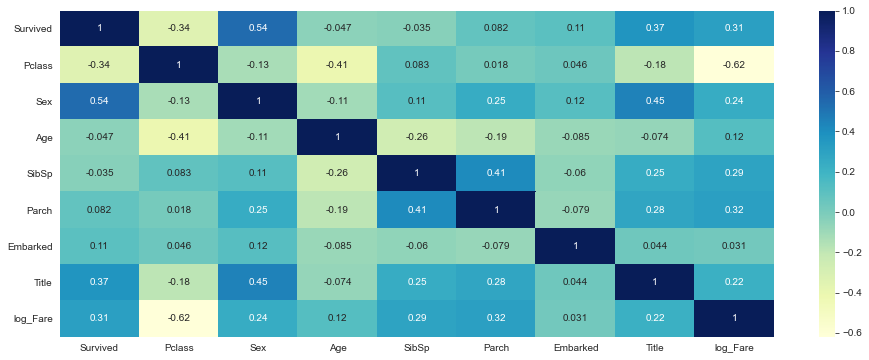

In [54]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(), annot=True, cmap='YlGnBu')

In [55]:
train.corr().Survived.abs().sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Title       0.373139
Pclass      0.338481
log_Fare    0.313736
Embarked    0.106811
Parch       0.081629
Age         0.047328
SibSp       0.035322
Name: Survived, dtype: float64

#### Final Train set & Test set

In [56]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,log_Fare
0,0,3,0,2,1,0,0,1,2
1,1,1,1,5,1,0,1,3,4
2,1,3,1,3,0,0,0,2,2
3,1,1,1,5,1,0,0,3,3
4,0,3,0,5,0,0,0,1,2


In [57]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,log_Fare
0,3,0,5,0,0,2,1,2
1,3,1,6,1,0,0,3,4
2,2,0,6,0,0,2,1,2
3,3,0,3,0,0,0,1,3
4,3,1,2,1,1,0,3,2


# Model Building

Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation and the accuracy in scorring. Then i tunned some hyperparameters of each model by using GridSerchCV and sometimes RandomizeSearchCV if i have a lot of possible combination and might take a long time to execute, in order to get the best model with the best combination of hyperparameters that minimize the log function and output a high accuracy score 

   - SGDClassifier
   - LogisticRegression
   - KNeighborsClassifier
   - RidgeClassifier
   - GaussianNB,
   - Perceptron
   - LinearSVC
   - DecisionTreeClassifier
   > _Ensemble methods:_
    - RandomForestClassifier
    - ExtraTreesClassifier
    - XGBClassifier
    - AdaBoostClassifier
    - BaggingClassifier
    - VotingClassifier
    - StackingClassifier

In [58]:
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold ,RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score, roc_curve, roc_auc_score, accuracy_score

In [59]:
from sklearn.model_selection import train_test_split


X = train.drop(['Survived'], axis=1)
y = train['Survived']

X_test = test

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
## Functions for tunning hyperparameters and find the best combination that miminimze the log fct
## and output the best accuracy of the model

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def GridSearchCV_(mod, param_grid):
    grid = GridSearchCV(estimator=mod, param_grid=param_grid, cv= 5, scoring='accuracy')
    
    grid.fit(X_train, y_train)
    model_best_params = grid.best_estimator_
    
    print('best score :', grid.best_score_ )
    print('best params :', grid.best_params_ )
    
    return model_best_params


def RandomizeSearchCV_(model, param_grid) :
    
    randomSCV = RandomizedSearchCV(model, param_grid, n_iter=30, cv=5, scoring='accuracy', random_state=42)

    randomSCV.fit(X_train, y_train)
    model_best_params = randomSCV.best_estimator_
    
    print('best score :', randomSCV.best_score_ )
    print('best params :', randomSCV.best_params_ )
    
    return model_best_params

In [61]:
# Create a empty dictionnary to add the best accuracy score of each model during modeling
classy_scores = {}

### Stochastic Gradien Descent Classifier :

- the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.
- This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)
- The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter.

**Hyperparameters**
- `alpha`: Constant that multiplies the regularization term,The higher the value, the stronger the regularization
- `penalty`: Regularize terms l2(Ridge), l1(Lasso), elasticNet(Convex combination of L2 and L1)
- `loss:Log`: LogisticRegression, Hinge:(soft-margin) linear Support Vector Machine

In [62]:
#SGDClassifier().get_params().keys()

In [63]:
%%time
from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier(random_state=0)

hyperameters ={'alpha':np.arange(0.0001, 3, 5),
              'penalty':['l1', 'l2', 'elasticnet'], 
              'loss':['log','hinge']
              }

best_model = GridSearchCV_(SGD_clf,hyperameters)

y_pred = best_model.predict(X_val)

acc_SGD_clf = accuracy_score(y_pred, y_val) 
print('accuracy_score', acc_SGD_clf)


classy_scores['SGDClassifier'] = acc_SGD_clf


best score : 0.7977445090121146
best params : {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
accuracy_score 0.776536312849162
CPU times: user 305 ms, sys: 14 ms, total: 319 ms
Wall time: 334 ms


### Logistic Regression :


- Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?)

- `So how does it work?` Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result
- The logistic also called the logit, noted σ(·) is a sigmoid function that outputs a number between 0 and 1.
- The cost function over the whole training set is simply the average cost over all trainng instances. It can be written in a single expression , called the `log loss`
- The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). But the good news is that `this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum `(if the learn‐ ing rate is not too large and you wait long enough). 


- The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: `C`. The higher the value of C, the less the model is regularized.
- Just like the other linear models, Logistic Regression models can be regularized using l1 or l2 penalties. Scitkit-Learn actually adds an l2 penalty by default.

**Hyperparameters :**
- `C:` is the the inverse of regularization (C=1/lambda) strength in Logistic Regression,higher values of C correspond to less regularization 
- `penalty` : Regularization term 

In [64]:
#LogisticRegression().get_params().keys()

In [65]:
%%time
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)

#Hyperparameters tuninig
hyperameters ={'C': [100, 10, 1.0, 0.1, 0.01],
               'penalty':['l2']
               }

best_model = GridSearchCV_(logreg, hyperameters)

y_pred = best_model.predict(X_val)
#return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples
acc_logreg = accuracy_score(y_val , y_pred )
print('accuracy_score',acc_logreg)

classy_scores['LogisticRegression'] = acc_logreg

best score : 0.8314685314685315
best params : {'C': 0.1, 'penalty': 'l2'}
accuracy_score 0.7988826815642458
CPU times: user 780 ms, sys: 11.1 ms, total: 791 ms
Wall time: 430 ms


### K Nearest Neighbor:


- The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
- `KNN captures the idea of similarity `(sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood calculating the distance between points on a graph.
- one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.

>**How it works??**
  - Calculate the distance between the query example and the current example from the data.
  - Add the distance and the index of the example to an ordered collection
  - Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
  - Pick the first K entries from the sorted collection
  - Get the labels of the selected K entries
  - If `regression`, return the `mean` of the K labels
  - If `classification`, return the `mode` of the K labels

>**Choosing the right value for K**
- To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before. Here are some things to keep in mind:
  - As we decrease the value of K to 1, our predictions become less stable
  - Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point)

>**Advantages:**
- The algorithm is simple and easy to implement.
- There’s no need to build a model, tune several parameters, or make additional assumptions.
- The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).

>**Disadvantages :**
- `The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.`

>**KNN in practise :**
- KNN’s main disadvantage of becoming significantly `slower as the volume of data increases makes it an impractical choice in environments where predictions need to be made rapidly.` Moreover, there are faster algorithms that can produce more accurate classification and regression results.
- KNN can still be useful in solving problems that have solutions that depend on identifying similar objects. An example of this is using the KNN algorithm in recommender systems, an application of KNN-search


**Hyperparmeters:**
- `n_neighbors` : the number of neighbors. If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes.
- `metric`: to test the contribution of members of the neighborhood via different weightings (weights)
- `weights`: The intuition behind weighted kNN, is to give more weight to the points which are nearby and less weight to the points which are farther away

In [66]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

hyperameters ={'n_neighbors': np.arange(1,21,1),
               'metric': ['euclidean','manhattan','minkowski'],
               'weights':['uniform','distance']
              }

best_model = GridSearchCV_(knn, hyperameters)

y_pred = best_model.predict(X_val)
acc_knn = accuracy_score( y_val, y_pred) 
print('accuracy_score', acc_knn)

classy_scores['KNeighborsClassifier'] = acc_knn

best score : 0.8286516300600807
best params : {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
accuracy_score 0.8044692737430168
CPU times: user 5.49 s, sys: 50.5 ms, total: 5.54 s
Wall time: 5.43 s


### Ridge Classifier



- Ridge regression is a penalized linear regression model for predicting a numerical value.
- Nevertheless, it can be very effective when applied to classification.

**Hyperparameters :**
- the most important parameter to tune is the regularization strength (`alpha`). 

In [67]:
%%time
from sklearn.linear_model import RidgeClassifier

Ridge = RidgeClassifier(random_state=0)

hyperameters ={ 'alpha':np.arange(.1,1,0.1)
              }

best_model = GridSearchCV_(Ridge, hyperameters)

y_pred = best_model.predict(X_val)
acc_ridge = accuracy_score(y_pred, y_val) 
print('accuracy_score',acc_ridge)

classy_scores['RidgeClassifier'] = acc_ridge

best score : 0.8146262188515709
best params : {'alpha': 0.1}
accuracy_score 0.7653631284916201
CPU times: user 642 ms, sys: 10.5 ms, total: 653 ms
Wall time: 341 ms


### Gaussian Naive Bayes:


- The Naive Bayes classifiers are working based on the Bayes’ theorem, `which describes the probability of an event, based on prior knowledge of conditions be related of conditions to the event`. It is a very simple and fast classifier and works sometimes very good, and even without much effort you can get a okay accuracy.

**Hyperparameters :**
- Have two hyperparameters to tune : `priors` and `var_smoothing`



In [68]:
%%time
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

hyperameters ={ 'var_smoothing':np.logspace(0,-9, num=100)
              }

best_model = GridSearchCV_(gaussian, hyperameters)
y_pred = best_model.predict(X_val)
acc_gaussian = accuracy_score(y_pred, y_val) 
print('accuracy_score',acc_gaussian)

classy_scores['GaussianNB'] = acc_gaussian

best score : 0.8174529695656456
best params : {'var_smoothing': 0.0657933224657568}
accuracy_score 0.7932960893854749
CPU times: user 3 s, sys: 31.1 ms, total: 3.03 s
Wall time: 2.96 s


### Perceptron :


- The perceptron model is a more general computational model than McCulloch-Pitts neuron. It takes an input, aggregates it (weighted sum) and returns 1 only if the aggregated sum is more than some threshold else returns 0.
- A single perceptron can only be used to implement linearly separable functions. It takes both real and boolean inputs and associates a set of weights to them, along with a bias 
- A perceptron, a neuron’s computational prototype, is categorized as the simplest form of a neural network
- A perceptron has one or more than one inputs, a process, and only one output. 
- The concept of perceptron has a critical role in machine learning. It is used as an algorithm or a linear classifier to facilitate supervised learning of binary classifiers. 

In [69]:
%%time
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=0)

hyperameters ={'penalty':['l1', 'l2', 'elasticnet'],
               'alpha':np.arange(0.000001,2, 0.1)
              }

best_model = GridSearchCV_(perceptron, hyperameters)
y_pred = best_model.predict(X_val)
acc_perceptron = accuracy_score(y_pred, y_val) 
print('accuracy_score',acc_perceptron)

classy_scores['Perceptron'] = acc_perceptron

best score : 0.7569782330345711
best params : {'alpha': 1e-06, 'penalty': 'l2'}
accuracy_score 0.6536312849162011
CPU times: user 1.96 s, sys: 21.9 ms, total: 1.99 s
Wall time: 2.04 s


### Linear Support Vector Machine :



- A Support Vector Machine (SVM) is a `very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.`
- SVMs are particularly well suited for classification `of complex but small or medium-sized datasets.`
- You can think of an SVM classifier as fitting the widest possible street between the classes. This is called large margin classification.
- `SVMs are sensitive to the feature scales`

>**Hard Margin Classification**
- If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification . There are two main issues with hard margin classification :
     - First, it only works if the data is linearly separable
     - second it is quite sensitive to outliers
- it is impossible to find a hard margin, and on the right the decision boundary ends up very different  without the outlier, and it will `probably not generalize as well.`

>**Soft Margin Classification**
- To avoid these issues it is preferable to use a more flexible model. The objective is to `find a good balance between keeping the street as large as possible and limiting the margin violations` (i.e., instances that end up in the middle of the street or even on the wrong side). 
- If your SVM model is `overfitting`, you can try regularizing it by `reducing C`.
- Alternatively, you could use the SVC class, using `SVC(kernel="linear", C=1)`, but it is much slower, especially with large training sets, so it is not recommended. 
- Unlike Logistic Regression classifiers, `SVM classifiers do not output probabilities for each class.`
- Another option is to use the SGDClassifier class, with `SGDClassifier(loss="hinge", alpha=1/(m*C))`. This applies regular Stochastic Gradient Descent (see Chapter 4) to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core train‐ ing), or to handle online classification tasks.


**Hyperparameters**
- `Kernel` : will control the manner in which the input variables will be projected. There are many to choose from, but linear, polynomial, and RBF are the most common, perhaps just linear and RBF in practice
- `loss` : for loss function
   - hinge loss is used for "maximum-margin" classification, most notably for SVMs
- `C` : control the balance between keeping the street as large as possible and limitting the margin violations .Smaller value of C leads to a wider street but more margin violation
- `dual` : for better performance you should set the dual hyperparameter to False

In [70]:
#LinearSVC().get_params().keys()

In [71]:
%%time
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(random_state=0, loss='squared_hinge', dual=False, penalty='l2')

hyperameters ={ 
               'C':np.arange(1,100,3),
               'max_iter':[100000]
              }

best_model = GridSearchCV_(linear_svc, hyperameters)
y_pred = best_model.predict(X_val)
acc_linear_svc = accuracy_score(y_pred, y_val) 
print('accuracy_score',acc_linear_svc)

classy_scores['LinearSVC'] = acc_linear_svc

best score : 0.8174332709543977
best params : {'C': 1, 'max_iter': 100000}
accuracy_score 0.776536312849162
CPU times: user 1.06 s, sys: 12.5 ms, total: 1.07 s
Wall time: 1.1 s


### Decision Tree :


- Decision Tree is one of the popular and most widely used Machine Learning Algorithms because of its robustness to noise, tolerance against missing information, handling of irrelevant, redundant predictive attribute values, low computational cost, interpretability, fast run time and robust predictors.
- Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are very powerful algorithms, `capable of fitting complex datasets`. 
- One of the many `qualities of Decision Trees is that they require very little data preparation. In particular, they don’t require feature scaling or centering at all.`
- To avoid overfitting the training data, we need to restrict the Decision Tree’s freedom during training. 

>**Making Predictions**
- A node’s samples attribute counts how many training instances it applies to.
- a node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class. 
- Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.
- A Decision Tree can also estimate the probability that an instance belongs to a particular class k:
- Scikit-Learn uses `the Classification And Regression Tree (CART) algorithm` to train Decision Trees (also called “growing” trees). 

>**How it works**
- The idea is really quite simple: `the algorithm first splits the training set in two subsets using a single feature k and a threshold tk ` (e.g., “petal length ≤ 2.45 cm”). `How does it choose k and tk? It searches for the pair (k, tk) that produces the purest subsets `
- Once it has successfully split the training set in two, it splits the subsets using the same logic, then the subsubsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity. 
- As you can see, `the CART algorithm is a greedy algorithm`: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.

>**Gini Impurity or Entropy?**
- By default, the Gini impurity measure is used, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy".(entropy is zero when it contains instances of only one class)
- So should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. `Gini impurity is slightly faster to compute, so it is a good default`. However, `when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees`




**Hyperparameter tuning**

- `Note that most of these hyperparameters are tied to one other` 
- `criterion` :The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Impurity is a measure of the homogeneity of the labels on a node
   - Information gain uses the entropy measure as the impurity measure and splits a node such that it gives the most amount of information gain. Whereas Gini Impurity measures the divergences between the probability distributions of the target attribute’s values and splits a node such that it gives the least amount of impurity.
- `splitter` :The strategy used to choose the split at each node. Supported strategies are `“best”` to choose the best split and `“random”` to choose the best random split.
    - the only difference is, in the `“best”` splitter it evaluate all splits using the criterion before splitting whereas the `“random”` splitter uses a random uniform function with min_feature_value, max_feature_value and random_state as inputs.
    - Let’s say you have hundreds of features, then “best” splitter would be ideal because it will calculate the best features to split based on the impurity measure and use that to split the nodes, whereas if you choose “random” you have a high chance of ending up with features that don’t really give you that much information, which would lead to a more deeper less precise tree.
    - the `“random” splitter has some advantages ,it is also less prone to overfitting` because you are not essentially calculating the best split before each split and the additional randomness will help you here, so if your model is overfitting, then you can change the splitter to “random” and retrain.
- `max_depth` :The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- `min_samples_splits` :(also called children)specifies the minimum number ofsamples required to split an internal node
- `min_samples_leaf `: the minimum number of samples required to be at a leaf node
- `max_features` : max nbr of features that are evaluated for splitting at each node


In [72]:
%%time
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state=0)

hyperameters ={'criterion':['gini','entropy'],
               'max_depth':np.arange(1,100,5),
               'min_samples_leaf':np.arange(1,500,50)
               }

best_model = GridSearchCV_(decisiontree, hyperameters)

y_pred = best_model.predict(X_val)
acc_decisiontree = accuracy_score(y_pred, y_val)
print('accuracy_score',acc_decisiontree)

classy_scores['DecisionTreeClassifier'] = acc_decisiontree

best score : 0.8159952723333005
best params : {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1}
accuracy_score 0.8156424581005587
CPU times: user 10.8 s, sys: 79.4 ms, total: 10.9 s
Wall time: 10.9 s


### Random Forest :


- is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting)
- With a few exceptions, a RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperpara‐ meters of a BaggingClassifier to control the ensemble itself
- The Random Forest algorithm introduces `extra randomness when growing trees`; instead of searching for the very best feature when splitting a node , it searches for the best feature among a random subset of features. `This results in a greater tree diversity`, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model.

bag_clf = BaggingClassifier( DecisionTreeClassifier(`plitter="random"`, max_leaf_nodes=16), n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)


In [73]:
%%time
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(bootstrap=True, n_jobs=-1, criterion='gini', random_state=0 )

hyperameters ={'max_depth':np.arange(1,100,5),
               'n_estimators':np.arange(100,500,20),
               'min_samples_leaf':np.arange(1,200,20)
               }

best_model = RandomizeSearchCV_(randomforest, hyperameters)

y_pred = best_model.predict(X_val)
acc_randomforest = accuracy_score(y_pred, y_val)
print('accuracy_score',acc_randomforest)

classy_scores['RandomForestClassifier'] = acc_randomforest

best score : 0.8132079188417217
best params : {'n_estimators': 460, 'min_samples_leaf': 21, 'max_depth': 41}
accuracy_score 0.7877094972067039
CPU times: user 43.7 s, sys: 3.35 s, total: 47.1 s
Wall time: 1min


### Extra Trees Classifier :

- When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting (as discussed earlier). It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do).
- A `forest of such extremely random trees is simply called an Extremely Randomized Trees ensemble (or Extra-Trees for short)`
- Once again, this trades more bias for a lower variance. 
- It also makes Extra-Trees much `faster to train than regular Random Forests` since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree.

In [74]:
#ExtraTreesClassifier().get_params().keys()

In [75]:
%%time 
from sklearn.ensemble import ExtraTreesClassifier

ExtraTrees = ExtraTreesClassifier(n_jobs=-1, random_state=0, bootstrap=True)

hyperameters ={'max_depth':np.arange(1,100,10),
               'n_estimators':np.arange(100,500,50)
               }

best_model = GridSearchCV_(ExtraTrees, hyperameters)
y_pred = best_model.predict(X_val)
acc_extra = accuracy_score(y_pred, y_val)
print('accuracy_score',acc_extra)

classy_scores['ExtraTreesClassifier'] = acc_extra

best score : 0.8117797695262485
best params : {'max_depth': 11, 'n_estimators': 350}
accuracy_score 0.8100558659217877
CPU times: user 1min 45s, sys: 10.1 s, total: 1min 55s
Wall time: 2min 25s


### XGBoost :

- Is arguably the most powerful ML algorithm out there today
- XGBoost is `a Decision Tree based enmeble ML algorithm that uses a gradient Boosting framework `.
- It's a perfect combination of software and hardware optimazation technique to yield superior results using less computing Resources in the shortest amount of time
- `Does not take a long time in training + Make good prediction`


**Hyperparameters:**
- `learning_rate`: step size shrinkage used to prevent overfitting. Range is (0,1)
- `max_depth`: determines how deeply each tree is allowed to grow during any boosting round.
- `subsample`: percentage of samples used per tree. Low value can lead to underfitting.
- `colsample_bytree`: percentage of features used per tree. High value can lead to overfitting.
- `n_estimators`: number of trees you want to build.
- `objective`: determines the loss function to be used like `reg:linear` for regression problems, `reg:logistic` for classification problems with only decision, `binary:logistic` for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.
- `gamma`: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- `alpha`: L1 regularization on leaf weights. A large value leads to more regularization.
- `lambda`: L2 regularization on leaf weights and is smoother than L1 regularization.

In [76]:
%%time
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=0)

hyperameters = {
    'lambda':np.arange(1,10,2),
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
                 }

best_model_xgb = GridSearchCV_(model_xgb, hyperameters)
y_pred = best_model_xgb.predict(X_val)
acc_xgb = accuracy_score(y_pred, y_val)
print('accuracy_score',acc_xgb)

classy_scores['XGBClassifier'] = acc_xgb

best score : 0.8412882891756132
best params : {'lambda': 9, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 20}
accuracy_score 0.8212290502793296
CPU times: user 2min 26s, sys: 2.38 s, total: 2min 28s
Wall time: 39.4 s


### Adaboost  Classifier :

- Boosting (originally called hypothesis boosting) `refers to any Ensemble method that can combine several weak learners into a strong learner`. `The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor`.
- One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost.
- As you can see, this sequential learning technique has some similarities with Gradient Descent, except that instead of tweaking a single predictor’s parameters to minimize a cost function, AdaBoost adds predictors to the ensemble, gradually making it better.
- There is one important drawback to this sequential learning technique: `it cannot be parallelized (or only partially), since each predictor can only be trained after the previous predictor has been trained and evaluated`. As a result, it does not scale as well as bagging or pasting.
- If your AdaBoost ensemble is overfitting the training set, you can try reducing the number of estimators or more strongly regularizing the base estimator.
- Scikit-Learn actually `uses a multiclass version of AdaBoost called SAMME` (which stands for Stagewise Additive Modeling using a Multiclass Exponential loss function). `When there are just two classes, SAMME is equivalent to AdaBoost`. Moreover, `if the predictors can estimate class probabilities (i.e., if they have a predict_proba() method), Scikit-Learn can use a variant of SAMME called SAMME.R` (the R stands for “Real”), which relies on class probabilities rather than predictions and generally performs better.

In [77]:
%%time
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=200, 
                             algorithm="SAMME.R",learning_rate=0.5)

ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_val)
acc_adaboost = accuracy_score(y_pred, y_val)
print('accuracy_score',acc_adaboost)

classy_scores['AdaBoostClassifier'] = acc_adaboost

accuracy_score 0.8212290502793296
CPU times: user 705 ms, sys: 28.5 ms, total: 734 ms
Wall time: 415 ms


### Bagging Classifier :

- One way to get a diverse set of classifiers is `to use very different training algorithms`, as just discussed. Another approach `is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set`. When sampling is performed `with replacement`, this method is called `bagging` (short for bootstrap aggregating). When sampling is performed `without replacement`, it is called `pasting`.
- bagging allows training instances to be sampled several times for the same predictor.
- the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode (i.e., `the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression`.
- `aggregation reduces both bias and variance`.
- `predictors can all be trained in parallel, via different CPU cores or even different servers. Similarly, predictions can be made in parallel. This is one of the reasons why bagging and pasting are such popular methods: they scale very well.`
- The BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities (i.e., if it has a predict_proba() method), which is the case with Decision Trees classifiers.
- Overall, bagging often results in better models, which explains why it is generally preferred.
- Support Out-of-Bag Evaluation approach

In [78]:
#BaggingClassifier().get_params().keys()

In [79]:
%%time
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier( DecisionTreeClassifier(), n_estimators=500,
                             bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_val)
acc_bagging = accuracy_score(y_pred, y_val)
print('accuracy_score',acc_bagging)


classy_scores['BaggingClassifier'] = acc_bagging

accuracy_score 0.8044692737430168
CPU times: user 185 ms, sys: 25.5 ms, total: 211 ms
Wall time: 769 ms


### Voting Classifier :

- A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a `hard voting classifier` 
- this voting classifier often achieves a higher accuracy than the best classifier in the ensemble. In fact, even if each classifier is a weak learner (meaning it does only slightly better than random guessing), the ensemble can still be a strong learner (achieving high accuracy), provided there are a sufficient number of weak learners and they are sufficiently diverse.
- Ensemble methods `work best when the predictors are as independent from one another as possible`. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, improving the ensemble’s accuracy.

In [80]:
%%time
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

LR_clf = LogisticRegression() 
rnd_clf = RandomForestClassifier() 
svm_clf = SVC()

voting_clf = VotingClassifier(
estimators=[('lr', LR_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')


voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_val)
acc_voting = accuracy_score(y_pred, y_val)
print('accuracy_score',acc_voting)


classy_scores['VotingClassifier'] = acc_voting

accuracy_score 0.8156424581005587
CPU times: user 404 ms, sys: 7.41 ms, total: 412 ms
Wall time: 233 ms


### Stacking :

-  It is based on a simple idea: instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble,` why don’t we train a model to perform this aggregation?`

In [81]:
%%time
from sklearn.ensemble import StackingClassifier

model1 = SGDClassifier()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()

SC_clf = StackingClassifier([('SGD',model1),('tree',model2),('KNN',model3)],
                              final_estimator=KNeighborsClassifier())

SC_clf.fit(X_train, y_train)
y_pred = SC_clf.predict(X_val)
acc_stacking = accuracy_score(y_pred, y_val)
print('accuracy_score',acc_stacking)


classy_scores['StackingClassifier'] = acc_stacking

accuracy_score 0.7877094972067039
CPU times: user 141 ms, sys: 2.47 ms, total: 143 ms
Wall time: 146 ms


### Select the best model

In [82]:
classy_scores

{'SGDClassifier': 0.776536312849162,
 'LogisticRegression': 0.7988826815642458,
 'KNeighborsClassifier': 0.8044692737430168,
 'RidgeClassifier': 0.7653631284916201,
 'GaussianNB': 0.7932960893854749,
 'Perceptron': 0.6536312849162011,
 'LinearSVC': 0.776536312849162,
 'DecisionTreeClassifier': 0.8156424581005587,
 'RandomForestClassifier': 0.7877094972067039,
 'ExtraTreesClassifier': 0.8100558659217877,
 'XGBClassifier': 0.8212290502793296,
 'AdaBoostClassifier': 0.8212290502793296,
 'BaggingClassifier': 0.8044692737430168,
 'VotingClassifier': 0.8156424581005587,
 'StackingClassifier': 0.7877094972067039}

In [83]:
sorted(classy_scores.items(), key=lambda x: x[1], reverse=True)

[('XGBClassifier', 0.8212290502793296),
 ('AdaBoostClassifier', 0.8212290502793296),
 ('DecisionTreeClassifier', 0.8156424581005587),
 ('VotingClassifier', 0.8156424581005587),
 ('ExtraTreesClassifier', 0.8100558659217877),
 ('KNeighborsClassifier', 0.8044692737430168),
 ('BaggingClassifier', 0.8044692737430168),
 ('LogisticRegression', 0.7988826815642458),
 ('GaussianNB', 0.7932960893854749),
 ('RandomForestClassifier', 0.7877094972067039),
 ('StackingClassifier', 0.7877094972067039),
 ('SGDClassifier', 0.776536312849162),
 ('LinearSVC', 0.776536312849162),
 ('RidgeClassifier', 0.7653631284916201),
 ('Perceptron', 0.6536312849162011)]

> _**As can be seen from the sorted dictionary belew, XGBClassifier resulted to be the best model for this dataset**_

## Further Evaluation


In [84]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=0)

hyperameters = {
    'lambda':np.arange(1,10,2),
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
                 }

best_model = GridSearchCV_(model_xgb, hyperameters)
y_pred = best_model.predict(X_val)
acc_xgb = accuracy_score(y_pred, y_val)
print('accuracy_score',acc_xgb)

classy_scores['XGBClassifier'] = acc_xgb

best_model_xgb

best score : 0.8412882891756132
best params : {'lambda': 9, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 20}
accuracy_score 0.8212290502793296


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='', lambda=9,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=9, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Learning Curve

- Learning curves are plots that show changes in learning performance over time in terms of experience.
- Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit, or well-fit model.

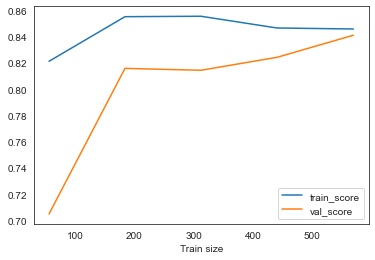

In [85]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(best_model_xgb, X_train, y_train, cv=5, random_state =0, n_jobs=-1 )

plt.plot(N, train_score.mean(axis=1), label='train_score')
plt.plot(N, val_score.mean(axis=1), label='val_score')
plt.xlabel('Train size')
plt.legend()

- we will assume that we are looking at a Maximizing metric, which means that bigger scores on the y-axis indicate more or better learning.

**First let’s look at the performance on the training data:**
- As we see from the learning curve below the training score increases to a high value then mostly still flatting at a high value then start decreasing a lit bit and end up flatting in a high value which means This means that the model performs significantly better on the training data

**Second let’s look at the performance on the validating data:**
- For the validation score, we see when the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation score is initially quite small. Then as the model is shown more training examples, it learns and thus the validation score slowly goes up 

> we deduce the the plot of learning curve shows a `good fit` because : The plot of training score is high and the plot of validation score increases and has a small gap with the training score.


### Confusion Matrix



- _The accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others)_.
-  A much better way to evaluate the performance of a classifier is to look at the confusion matrix
- The general idea is to count the number of times instances of class A are classified as class B
- `To compute the confusion matrix`, `we first need to have a set of predictions, so they can be compared to the actual targets. Instead, we can use the cross_val_predict() function`
- Just like the cross_val_score() function, `cross_val_predict() `performs K-fold cross-validation, but instead of returning the evaluation scores, `it returns the predictions made on each test fold`.This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).
- __Each `row` in a confusion matrix represents an `actual class`, while each `column` represents a `predicted class`.__

In [86]:
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(best_model_xgb, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[402,  37],
       [ 76, 197]])

> The first row is about the `not-survived-predictions`: 402 passengers were correctly classified as not survived (called true negatives) and 37 where wrongly classified as not survived (false positives).
The second row is about the `survived-predictions`: 76 passengers where wrongly classified as survived (false negatives) and 197 where correctly classified as survived (true positives).

- The confusion matrix gives you a lot of information, but sometimes we may prefer a more concise metric.
- Some of those metrics :
  - Precision (equivalent to the posterior prbability p(A!B))
  - Recall (aka Sensibility, true positive rate or completeness):
  - Specificity (aka True negative Rate)
  - F1 score : the harmonic mean between Precision and Recall
  - Classification Report : combine all the those metrics

In [87]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,classification_report

print('Precision Score :',precision_score(y_train, y_train_pred))
print('Recall Score :',recall_score(y_train, y_train_pred))
print('F1 Score :',f1_score(y_train, y_train_pred) )

print('Classification Report : \n ', classification_report(y_train, y_train_pred))

Precision Score : 0.8418803418803419
Recall Score : 0.7216117216117216
F1 Score : 0.777120315581854
Classification Report : 
                precision    recall  f1-score   support

           0       0.84      0.92      0.88       439
           1       0.84      0.72      0.78       273

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



>**Precision & Recall**
- Our model predicts 84% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 72 % of the people who actually survived.

>**F1_score**
- There we have it, a 77 % F-score. The score is not that high, because we have a recall of 73%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. 



### precision/recall curve

with these scores above we can compute precision and recall for all possible thresholds using the precision_recall_curve() function

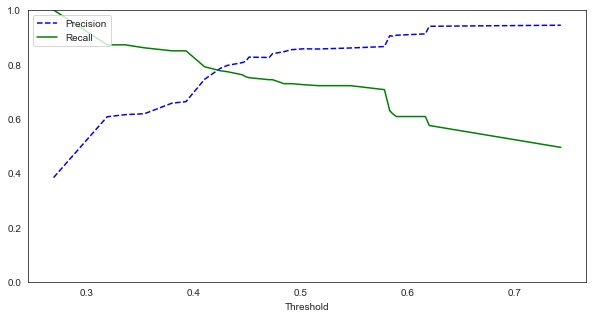

In [88]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = best_model_xgb.predict_proba(X_train)
y_scores = y_scores[:,1] #choose class 1 (Not survived)

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plt.figure(figsize=(10,5))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### The ROC Curve

- The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. 
- Hence the ROC curve plots sensitivity (recall) versus specificity.

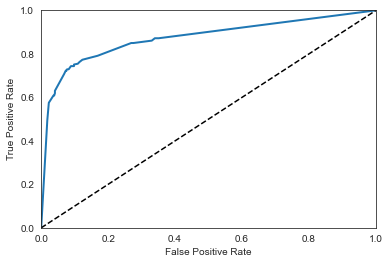

In [90]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr, tpr) 
plt.show()

- A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

In [92]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train, y_scores)

0.872629268984622

### Set a threshold

- As a reminder, our goal through this notebook is to analyze the titanic data set and predict if a passenger could either survive or not based on several features.
- During the classification project, we usually prefer to focus more on a particular metric either Recall or Specificity which matches exactly our requirements. For example in some scenario: we might probably prefer a classifier with low recall but high precision, rather than a classifier that has a much higher recall 
- In our context I will care more about Precision (False Positive), in other words, I want as much as possible that the positive predictions belong indeed to the positive class, I mean I don't want to predict a passenger will survive but actually he did not survive

In [93]:
# the proba of not being survive in titanic
best_model_xgb.predict_proba(X_val)[:,1]

array([0.26863676, 0.26863676, 0.37940186, 0.7430672 , 0.40983382,
       0.3924763 , 0.7430672 , 0.7430672 , 0.5021258 , 0.6163569 ,
       0.26863676, 0.7430672 , 0.26863676, 0.7430672 , 0.7430672 ,
       0.57808286, 0.26863676, 0.26863676, 0.26863676, 0.6163569 ,
       0.26863676, 0.7430672 , 0.26863676, 0.3924763 , 0.57808286,
       0.7430672 , 0.26863676, 0.57808286, 0.7430672 , 0.35369325,
       0.26863676, 0.7430672 , 0.26863676, 0.3924763 , 0.26863676,
       0.47337905, 0.26863676, 0.26863676, 0.26863676, 0.4703074 ,
       0.4449011 , 0.26863676, 0.26863676, 0.26863676, 0.7430672 ,
       0.26863676, 0.26863676, 0.7430672 , 0.26863676, 0.42457116,
       0.3924763 , 0.44840488, 0.7430672 , 0.26863676, 0.3924763 ,
       0.31873983, 0.3924763 , 0.35369325, 0.35369325, 0.26863676,
       0.26863676, 0.40983382, 0.7430672 , 0.47337905, 0.546476  ,
       0.26863676, 0.47337905, 0.4703074 , 0.7430672 , 0.7430672 ,
       0.7430672 , 0.42457116, 0.4449011 , 0.26863676, 0.26863

In [94]:
def predict_threshold (model,X_val,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_val)[:,1]>thresholds,1,0) 

In [95]:

for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(best_model_xgb,X_val,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_val,y_predict))

Threshold : 0.0
[[  0 110]
 [  0  69]]
Threshold : 0.1
[[  0 110]
 [  0  69]]
Threshold : 0.2
[[  0 110]
 [  0  69]]
Threshold : 0.30000000000000004
[[71 39]
 [ 4 65]]
Threshold : 0.4
[[82 28]
 [11 58]]
Threshold : 0.5
[[100  10]
 [ 22  47]]
Threshold : 0.6000000000000001
[[106   4]
 [ 28  41]]
Threshold : 0.7000000000000001
[[109   1]
 [ 32  37]]
Threshold : 0.8
[[110   0]
 [ 69   0]]
Threshold : 0.9
[[110   0]
 [ 69   0]]


- with a threshold equals 0.6, the False Positive FP increases to 10 with an acceptable False negative
- WHY did I not choose the threshold that gives me a null false positive? Because to simply I should take into account the FN too. A classifier even with null FP or null FN and a high FN, resp FP actually is not a good classifier, we should keep some logical balance between the FP and FN 

## References :
- Titanic kaggle competition
- hands on machine learning with scikit-learn and tensorflow